In [1]:
import sklearn.datasets
import pandas as pd
import os
import numpy as np
import nb_black
import statsmodels.api as sm
import textdistance
import matplotlib.pyplot as plt
import catboost as cb
import asyncio

%reload_ext lab_black

In [3]:
data = sklearn.datasets.load_wine()
wine = pd.DataFrame(data.data, columns=data.feature_names)
wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [4]:
(
    wine.rename(columns={"color_intensity": "ci"})
    .assign(color_filter=lambda x: np.where((x.hue > 1) & (x.ci > 7), 1, 0))
    .query("alcohol > 14 and color_filter == 1")
    .sort_values("alcohol", ascending=False)
    .reset_index(drop=True)
    .loc[:, ["alcohol", "ci", "hue"]]
)

,alcohol,ci,hue
0,14.38,7.5,1.20
1,14.19,8.7,1.23


In [5]:
def csnap(df, func=lambda x: x.shape, msg=None):
    """
    Custom function to print things in method chaining. Returns the df to further use in chaining.
    """
    if msg:
        print(msg)
    display(func(df))
    return df

In [ ]:
dfaaa = (
    wine.pipe(csnap)
    .rename(columns={"color_intensity": "ci"})
    .assign(color_filter=lambda x: np.where((x.hue > 1) & (x.ci > 7), 1, 0))
)

In [ ]:
output = (
    wine.groupby(["alcohol", "malic_acid"], as_index=False)
    .agg({"color_intensity": "mean"})
    .reset_index()
)

In [ ]:
output = wine.groupby(["alcohol", "malic_acid"], as_index=False).agg(
    {"color_intensity": "mean"}
)

In [ ]:
def steps_to(stair):
    if stair == 1:
        return 1
    elif stair == 2:
        return 2
    elif stair == 3:
        return 4
    else:
        return steps_to(stair - 3) + steps_to(stair - 2) + steps_to(stair - 1)


print(steps_to(5))

In [12]:
array = [11, 10, 2]
targetSum = 22


def twoNumberSum(array, targetSum):
    nums = {}
    for num in array:
        pot = targetSum - num
        if pot in nums:
            return [pot, num]
        else:
            nums[num] = True
    return []


twoNumberSum(array, targetSum)

[]

In [ ]:
class Protective(object):
    """
    aaa
    """

    def __init__(self, start_protected_value=0):
        self.protected_value = start_protected_value

    @property
    def protected_value(self):
        return self._protected_value

    @protected_value.setter
    def protected_value(self, value):
        if value != int(value):
            raise TypeError("protected_value must be an integer")
        if 0 <= value <= 100:
            self._protected_value = int(value)
        else:
            raise ValueError("protected_value must be " + "between 0 and 100 inclusive")

    @protected_value.deleter
    def protected_value(self):
        raise AttributeError("do not delete, protected_value can be set to 0")

In [ ]:
textdistance.hamming("test", ["test", "ss"])

In [106]:
def _get_sequences(qval, *sequences):
    """Prepare sequences.
    qval=None: split text by words
    qval=1: do not split sequences. For text this is mean comparing by letters.
    qval>1: split sequences by q-grams
    """
    # by words
    if not qval:
        return [s.split() for s in sequences]
    # by chars
    if qval == 1:
        return sequences
    # by n-grams
    return [find_ngrams(s, qval) for s in sequences]


def find_ngrams(input_list, n):
    return list(zip(*[input_list[i:] for i in range(n)]))


sequences = ["aaaa bbb", "bbb ccc"]
_get_sequences(2, *sequences)

[[('a', 'a'),
  ('a', 'a'),
  ('a', 'a'),
  ('a', ' '),
  (' ', 'b'),
  ('b', 'b'),
  ('b', 'b')],
 [('b', 'b'), ('b', 'b'), ('b', ' '), (' ', 'c'), ('c', 'c'), ('c', 'c')]]

In [43]:
from collections import Counter

def _get_sequences(self, *sequences):
        """Prepare sequences.
        qval=None: split text by words
        qval=1: do not split sequences. For text this is mean comparing by letters.
        qval>1: split sequences by q-grams
        """
        # by words
        if not 1:
            return [s.split() for s in sequences]
        # by chars
        if 1 == 1:
            return sequences
        # by n-grams
        return [find_ngrams(s, 1) for s in sequences]

def _intersect_counters(self, *sequences):
        intersection = sequences[0].copy()
        for s in sequences[1:]:
            intersection &= s
        return intersection
    
    
def _get_counters(self, *sequences):
        """Prepare sequences and convert it to Counters.
        """
        # already Counters
        if all(isinstance(s, Counter) for s in sequences):
            return sequences
        return [Counter(s) for s in _get_sequences(*sequences)]
    
_get_sequences('adddaa', 'aab')

('aab',)

In [89]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]
vectorizer = TfidfVectorizer(analyzer='char_wb', ngram_range=(2,2))
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names())


[' a', ' d', ' f', ' i', ' o', ' s', ' t', '. ', '? ', 'an', 'co', 'cu', 'd ', 'do', 'e ', 'e.', 'ec', 'en', 'fi', 'he', 'hi', 'ir', 'is', 'me', 'nd', 'ne', 'nt', 'oc', 'on', 'rd', 'rs', 's ', 'se', 'st', 't ', 't.', 't?', 'th', 'um']


In [115]:
bigram_vectorizer = CountVectorizer(ngram_range=(1, 2), token_pattern=r'\b\w+\b', min_df=1)
analyze = bigram_vectorizer.build_analyzer()
analyze('Bi-grams are cool!')
X_2 = bigram_vectorizer.fit_transform(corpus)
print(X_2.toarray())

[[0 0 1 0 1 1 1 1 0 0 0 0 1 1 0 0 0 0 1 0 1 0]
 [0 0 2 1 0 0 1 1 0 0 1 1 1 0 1 0 0 0 1 1 0 0]
 [1 1 0 0 0 0 1 1 0 1 0 0 1 0 0 1 1 1 1 0 1 0]
 [0 0 1 0 1 1 1 0 1 0 0 0 1 1 0 0 0 0 1 0 0 1]]


In [117]:
type(X_2)

scipy.sparse.csr.csr_matrix

In [53]:
import numpy as np
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer(smooth_idf=False)
transformer

counts = [[3, 0, 1],
          [2, 0, 0],
          [3, 0, 0],
          [4, 0, 0],
          [3, 2, 0],
          [3, 0, 2]]

tfidf = transformer.fit_transform(counts)
tfidf
tfidf.toarray(), transformer.idf_






2.791759469228055

In [91]:
from pprint import pprint
from time import time
import logging

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

print(__doc__)

# Display progress logs on stdout
logging.basicConfig(level=logging.INFO,
                    format='%(asctime)s %(levelname)s %(message)s')


# #############################################################################
# Load some categories from the training set
categories = [
    'alt.atheism',
    'talk.religion.misc',
]
# Uncomment the following to do the analysis on all the categories
#categories = None

print("Loading 20 newsgroups dataset for categories:")
print(categories)

data = fetch_20newsgroups(subset='train', categories=categories)
print("%d documents" % len(data.filenames))
print("%d categories" % len(data.target_names))
print()

# #############################################################################
# Define a pipeline combining a text feature extractor with a simple
# classifier
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', SGDClassifier()),
])

# uncommenting more parameters will give better exploring power but will
# increase processing time in a combinatorial way
parameters = {
    'vect__max_df': (0.5, 0.75, 1.0),
    # 'vect__max_features': (None, 5000, 10000, 50000),
    'vect__ngram_range': ((1, 1), (1, 2)),  # unigrams or bigrams
    # 'tfidf__use_idf': (True, False),
    # 'tfidf__norm': ('l1', 'l2'),
    'clf__max_iter': (20,),
    'clf__alpha': (0.00001, 0.000001),
    'clf__penalty': ('l2', 'elasticnet'),
    # 'clf__max_iter': (10, 50, 80),
}

if __name__ == "__main__":
    # multiprocessing requires the fork to happen in a __main__ protected
    # block

    # find the best parameters for both the feature extraction and the
    # classifier
    grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1)

    print("Performing grid search...")
    print("pipeline:", [name for name, _ in pipeline.steps])
    print("parameters:")
    print(parameters)
    t0 = time()
    grid_search.fit(data.data, data.target)
    print("done in %0.3fs" % (time() - t0))
    print()

    print("Best score: %0.3f" % grid_search.best_score_)
    print("Best parameters set:")
    best_parameters = grid_search.best_estimator_.get_params()
    for param_name in sorted(parameters.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))

Automatically created module for IPython interactive environment
Loading 20 newsgroups dataset for categories:
['alt.atheism', 'talk.religion.misc']
857 documents
2 categories

Performing grid search...
pipeline: ['vect', 'tfidf', 'clf']
parameters:
{'vect__max_df': (0.5, 0.75, 1.0), 'vect__ngram_range': ((1, 1), (1, 2)), 'clf__max_iter': (20,), 'clf__alpha': (1e-05, 1e-06), 'clf__penalty': ('l2', 'elasticnet')}
Fitting 5 folds for each of 24 candidates, totalling 120 fits
done in 38.613s

Best score: 0.957
Best parameters set:
	clf__alpha: 1e-05
	clf__max_iter: 20
	clf__penalty: 'l2'
	vect__max_df: 1.0
	vect__ngram_range: (1, 2)


In [114]:
ngram_vectorizer = CountVectorizer(analyzer='char', ngram_range=(2, 2))
counts = ngram_vectorizer.fit_transform(['words ml', 'wprds'])
ngram_vectorizer.get_feature_names()
#counts.toarray().astype(int)

[' m', 'ds', 'ml', 'or', 'pr', 'rd', 's ', 'wo', 'wp']

In [306]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from scipy.sparse import csr_matrix, csc_matrix
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]

vectorizer = CountVectorizer(ngram_range=(1,2))
X = vectorizer.fit_transform(corpus)


<4x22 sparse matrix of type '<class 'numpy.int64'>'
	with 39 stored elements in Compressed Sparse Row format>

In [366]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
import numpy as np
corpus = ['this is the first document',
          'this document is the second document',
          'and this is the third one',
          'is this the first document']

vocabulary = ['this', 'document', 'first', 'is', 'second', 'the', 'and', 'one']
pipe = Pipeline([('count', CountVectorizer(vocabulary=vocabulary)), ('tfid', TfidfTransformer())])
X = pipe.fit_transform(corpus)
X.sort_indices()
X.has_sorted_indices
X



# pipe.transform(corpus)
# pipe['count'].transform(corpus).toarray()
# pipe['tfid'].idf_
# pipe.transform(corpus).shape

<4x8 sparse matrix of type '<class 'numpy.float64'>'
	with 20 stored elements in Compressed Sparse Row format>

In [372]:
import re
def ngrams(string, n=3):
    string = re.sub(r'[,-./]|\sBD',r'', string)
    ngrams = zip(*[string[i:] for i in range(n)])
    return [''.join(ngram) for ngram in ngrams]
# Testing ngrams work for verification
print('All 3-grams in "Deluxroom":')

ngrams('aaa Deluxroom ')

All 3-grams in "Deluxroom":


['aaa',
 'aa ',
 'a D',
 ' De',
 'Del',
 'elu',
 'lux',
 'uxr',
 'xro',
 'roo',
 'oom',
 'om ']

In [ ]:
re.split(r'\s+', raw)

In [12]:
from typing import Protocol, runtime_checkable


@runtime_checkable
class Reader(Protocol):
    def read(self) -> str:

        pass


class FooReader:
    def read(self) -> str:
        return "foo"


type(FooReader())

__main__.FooReader

In [26]:
def t():
    a: aa


class A:
    instance_var: int = None
    instance_var2: int = "s"


A()
A.instance_var

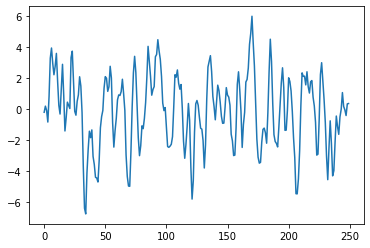

In [32]:
import numpy as np

np.random.seed(12345)
arparams = np.array([0.75, -0.25])
maparams = np.array([0.65, 0.35])
ar = np.r_[1, -arparams]  # add zero-lag and negate
ma = np.r_[1, maparams]  # add zero-lag
y = sm.tsa.arma_generate_sample(ar, ma, 250)

plt.plot(y)



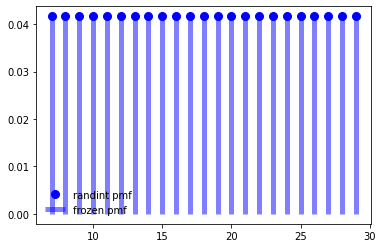

In [8]:
from scipy.stats import randint
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1);

low, high = 7, 31
mean, var, skew, kurt = randint.stats(low, high, moments='mvsk')

x = np.arange(randint.ppf(0.01, low, high), randint.ppf(0.99, low, high))
rv = randint(low, high)
ax.plot(x, randint.pmf(x, low, high), 'bo', ms=8, label='randint pmf')
ax.vlines(x, 0, rv.pmf(x), colors='b', lw=5, alpha=0.5, label='frozen pmf')
ax.legend(loc='best', frameon=False)
plt.show()

array([    64,    152,    245, ..., 404945, 404946, 404970])

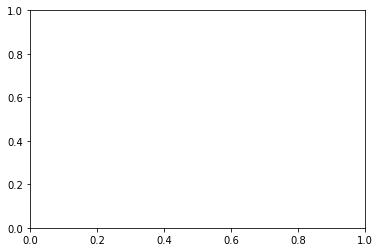

In [3]:
# Increasing data structure records
low, high = -20, 100
size = 10000

unif = np.random.randint(low, high, size)
obs = np.cumsum(unif)

fig, ax = plt.subplots(1, 1)
# ax.plot(obs)
obs

array([100,  99,  99, ..., 109, 110, 110])

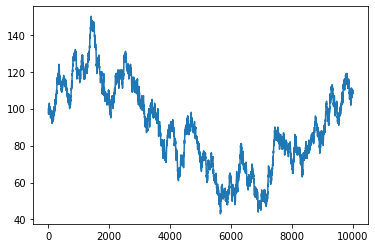

In [93]:
# Oscilating data structure records
low, high = -1, 2
size = 10000

init = 100
unif = np.random.randint(low, high, size)
obs = np.cumsum(np.concatenate(([100], unif)))

fig, ax = plt.subplots(1, 1)
ax.plot(obs)
obs

array([100000,  99986,  99981, ...,  45759,  45763,  45766])

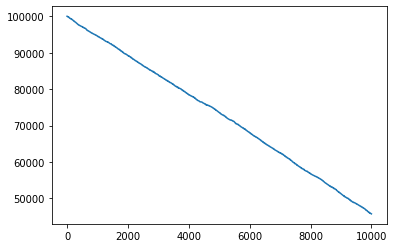

In [110]:
# Decreasing data structure records
low, high = -20, 10
size = 10000

init = 100000
unif = np.random.randint(low, high, size)
obs = np.cumsum(np.concatenate(([init], unif)))

fig, ax = plt.subplots(1, 1)
ax.plot(obs)
obs

In [9]:
import asyncio
import nest_asyncio
import time 

async def coro(seq) -> list:
    """'IO' wait time is proportional to the max element."""
    await asyncio.sleep(max(seq))
    return list(reversed(seq))

async def main():
    task = asyncio.create_task(coro([3, 2, 1]))  # Python 3.7+
    t = await asyncio.gather(task)
    print(f't: type {type(task)}')
    print(f't done: {task.done()}')
    return t

nest_asyncio.apply()
res = asyncio.run(main())
res
import datetime
time.strftime('%Y-%m-%dT%H-%M-%S')

t: type <class 'asyncio.tasks.Task'>
t done: True


'2021-08-05T10-02-25'